In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("husl")
#Home work starts - you need to understand these libraries - overview
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
House = pd.read_csv('house_data.csv')
House.head() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,1680,0,1987,0,98074,1800,7503


In [4]:
House.shape

(21613, 14)

In [5]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [6]:
House.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [7]:
House.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: >

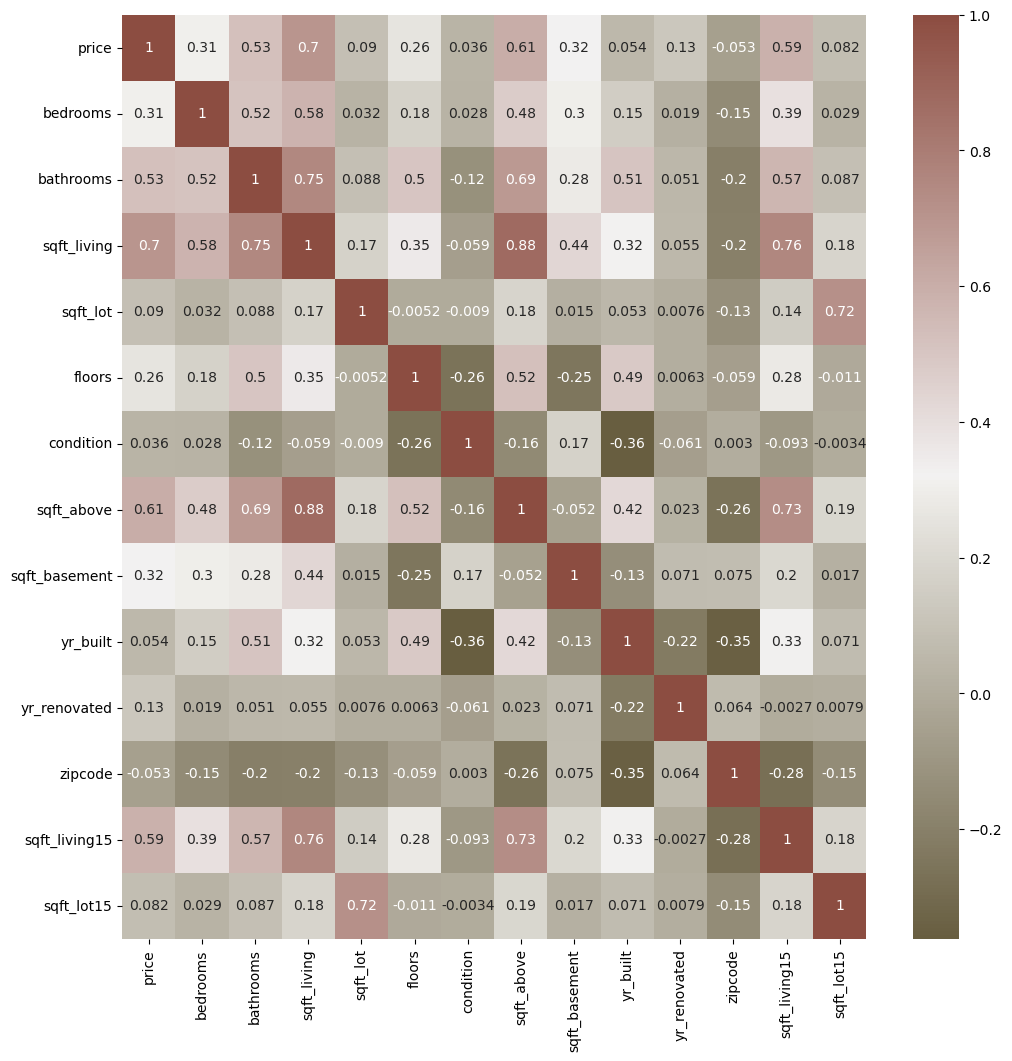

In [8]:
label_data = House.copy()
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [9]:
x=House[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
y=House['price']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=7)

In [11]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [12]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for bedrooms is -62853.85315180788
The coefficient for bathrooms is 62502.95038392017
The coefficient for sqft_living is 165.52174193067185
The coefficient for sqft_lot is -0.005345012606994715
The coefficient for floors is 63684.53247648986
The coefficient for condition is 25985.21702905868
The coefficient for sqft_above is 78.82756461003191
The coefficient for sqft_basement is 86.69417703525869
The coefficient for yr_built is -3112.731027030224
The coefficient for yr_renovated is 34.74032026384606
The coefficient for zipcode is 248.2301186576351
The coefficient for sqft_living15 is 99.71422887722292
The coefficient for sqft_lot15 is -0.678752332503791


In [13]:
print(regression_model.intercept_)

-18478573.893721797


In [14]:
regression_model.score(X_train, y_train)

0.5771804933438835

In [15]:
regression_model.score(X_test, y_test)

0.5560849968311518

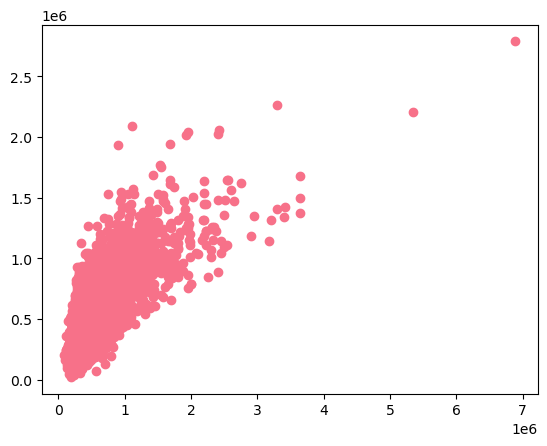

In [16]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test, y_pred)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('MAS:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAS: 157611.2976586517
MSE: 59983424869.01564
RMSE: 244915.13809688375
